In [205]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

import scipy.stats as ss
from sklearn.linear_model import LogisticRegression
pd.options.display.float_format = '{:.5g}'.format

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300)

Загружаем данные, сразу парсим колонки с датами.

In [139]:
df_row = pd.read_excel('test_task_dataset_created_20210611.xlsx',
                       sheet_name='Sheet1',
                       parse_dates=['crdeal_deallife__first_loan_open_date',
                                    'crdeal_deallife__last_loan_open_date',
                                    'crdeal_deallife__first_loan_open_date__donor_bnk',
                                   'crdeal_deallife__last_loan_open_date__donor_bnk'])

In [140]:
df_row.head().T

,0,1,2,3,4
target_flag,good,good,good,good,good
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah,40,72,77,6,8
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah,0,0,0,0,0
crdeal_deallife__loans_cnt__dldonor_bnk,4,2,4,1,5
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days,0,0,0,0,0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days,0,0,0,0,0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_45_days,0,0,0,0,0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_60_days,0,0,0,0,0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_90_days,0,0,0,0,0
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_120_days,0,0,0,0,0


Размечаем колонку с таргетом в числа

In [141]:
conditions = [
    (df_row['target_flag'] == 'good'),
    (df_row['target_flag'] == 'bad')]
choices = [0, 1]
df_row['target_flag'] =  np.select(conditions, choices, default=2)

In [142]:
df_row = df_row.convert_dtypes()

In [143]:
df_row.describe().T.sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
crdeal_deallife__loans_cnt__state_sold__opened_lteq_7_days,35217,0,0,0,0,0,0,0
crdeal_deallife__loans_cnt__state_discounted__opened_lteq_60_days,35217,0.00022716,0.01507,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__opened_lteq_120_days,35217,0.00045433,0.02131,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__opened_lteq_180_days,35217,0.00070988,0.026635,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__opened_lteq_360_days,35217,0.001221,0.034922,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__opened_lteq_45_days,35217,5.6791e-05,0.0075359,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__last_active_lteq_7_days,35217,8.5186e-05,0.0092294,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__last_active_lteq_30_days,35217,0.00065309,0.025548,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__opened_lteq_30_days,35217,5.6791e-05,0.0075359,0,0,0,0,1
crdeal_deallife__loans_cnt__state_discounted__opened_lteq_7_days,35217,2.8395e-05,0.0053287,0,0,0,0,1


Удаляем колонку "crdeal_deallife__loans_cnt__state_sold__opened_lteq_7_days", т.к. в ней все значения = 0

In [144]:
df_row.drop(columns='crdeal_deallife__loans_cnt__state_sold__opened_lteq_7_days', inplace=True)

Делим датасет на трэйн/тест

In [175]:
df_train = df_row[df_row.target_flag < 2]
print('Train', df_train.shape)
df_test = df_row[df_row.target_flag == 2]
print('Test', df_test.shape)
df_test_withnan = df_test.copy()

Train (31625, 284)
Test (3686, 284)


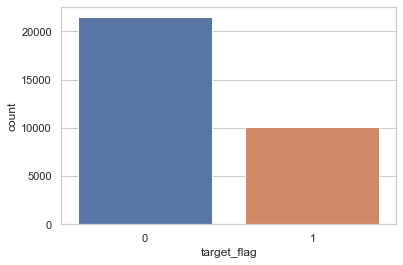

0    21485
1    10140
Name: target_flag, dtype: Int64

In [176]:
ax = sns.countplot(x = 'target_flag', data=df_train)
plt.show()

df_train['target_flag'].value_counts()

Проверяем пропуски в даных

In [177]:
# доля пропусков в каждом предикте
df_row['num_missing'] = df_row.isnull().sum(axis = 1)/df_row.shape[1]

In [178]:
df_row.num_missing.sort_values(ascending=False).head(100)

22612   0.99648
28958   0.99648
35259   0.99648
35064   0.99648
31926   0.99648
10871   0.99648
12512   0.99648
10539   0.99648
29733   0.99648
10031   0.99648
22304   0.99648
27266   0.99648
18912   0.99648
12491   0.99648
15137   0.99648
3263    0.99648
22522   0.99648
29085   0.99648
5910    0.99648
20666   0.99648
29102   0.99648
31421   0.99648
20982   0.99648
21349   0.99648
17152   0.99648
24062   0.99648
3360    0.99648
20925   0.99648
14508   0.99648
5438    0.99648
4271    0.99648
16137   0.99648
2628    0.99648
10714   0.99648
32054   0.99648
12026   0.99648
34252   0.99648
13363   0.99648
22865   0.99648
10748   0.99648
2543    0.99648
10023   0.99648
2505    0.99648
16973   0.99648
10804   0.99648
24913   0.99648
22653   0.99648
18209   0.99648
15955   0.99648
23520   0.99648
21104   0.99648
13138   0.99648
34055   0.99648
22069   0.99648
26622   0.99648
32868   0.99648
6229    0.99648
16295   0.99648
425     0.99648
35103   0.99648
20170   0.99648
4651    0.99648
25305   

In [179]:
df_test[df_test.crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah.isnull()].T

,6229,10453,10714,10748,11754,14508,20170,23520,31421,35084
target_flag,2,2,2,2,2,2,2,2,2,2
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_45_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_60_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_90_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_120_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [180]:
df_train[df_train.crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah.isnull()].T

,425,2369,2505,2543,2628,3181,3263,3360,4271,4500,...,30425,31926,32054,32122,32868,34055,34252,35064,35103,35259
target_flag,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_45_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_60_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_90_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_120_days,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Доли строк со всеми пропущенными значениями кроме таргета.

In [181]:
df_train[df_train.count(axis=1) == 1].shape[0]/df_train.shape[0] * 100

0.2656126482213439

In [182]:
df_test[df_test.count(axis=1) == 1].shape[0]/df_test.shape[0] * 100

0.27129679869777534

Убираем строки с пропусками во всех колонках кроме таргета, т.к. заполнить их объективно нет возможности.

In [183]:
df_train.dropna(subset=['crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah'], inplace=True)
df_test.dropna(subset=['crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah'], inplace=True)

По хорошему надо понимать что именно это за данные (колокни) и попытаться заполнить пропуски. Способы есть разные и их применеие зависит от понимания самих данных.
Подозреваю, что в данном датасете их убрали специально.

Проверяем дубликаты

In [184]:
if df_train[df_train.duplicated()].shape[0] + df_test[df_test.duplicated()].shape[0] == 0:
    print('ура!')

ура!


In [185]:
# сохраним данные для быстрой загрузки уже почищенных данных  
df_train.to_parquet('train.pq', compression='gzip')
df_test.to_parquet('test.pq', compression='gzip')

Переходим к оставшимся пропущенным данным.

In [186]:
df_train.isnull().mean().round(4).mul(100).sort_values(ascending=False)

crdeal_deallife__current_max_dpd__donor_bnk                                           13.66
crdeal_deallife__current_max_dpd__donor_mfo                                           10.53
crdeal_deallife__initial_amount_sum__state_clsd                                        6.09
crdeal_deallife__initial_amount_min__state_clsd                                        6.09
crdeal_deallife__historical_max_overdue_debt__clsd_state                               6.09
crdeal_deallife__initial_amount_max__state_clsd                                        6.09
crdeal_deallife__initial_amount_mean__state_clsd                                       6.09
crdeal_deallife__plan_debt_max__donor_bnk                                              5.32
crdeal_deallife__last_loan_status__donor_bnk                                           5.32
crdeal_deallife__initial_amount_sum__donor_bnk                                         5.32
crdeal_deallife__first_loan_status__donor_bnk                                   

In [187]:
df_test.isnull().mean().round(4).mul(100).sort_values(ascending=False)

crdeal_deallife__current_max_dpd__donor_bnk                                           11.24
crdeal_deallife__current_max_dpd__donor_mfo                                            6.37
crdeal_deallife__historical_max_overdue_debt__clsd_state                               5.47
crdeal_deallife__initial_amount_sum__state_clsd                                        5.47
crdeal_deallife__initial_amount_min__state_clsd                                        5.47
crdeal_deallife__initial_amount_max__state_clsd                                        5.47
crdeal_deallife__initial_amount_mean__state_clsd                                       5.47
crdeal_deallife__plan_debt_sum__donor_bnk                                              4.73
crdeal_deallife__first_loan_open_date__donor_bnk                                       4.73
crdeal_deallife__last_loan_open_date__donor_bnk                                        4.73
crdeal_deallife__last_loan_status__donor_bnk                                    

В данном случае поступим макисмально просто, заменив все пропущенные цифровые данные медианой. Если бы было "понимание" расшифровки колонок, можно было бы "побороться".

In [188]:
numeric_train = df_train.select_dtypes('number').columns
df_train[numeric_train] = df_train[numeric_train].fillna(df_train[numeric_train].median())
numeric_test = df_test.select_dtypes('number').columns
df_test[numeric_test] = df_test[numeric_test].fillna(df_test[numeric_test].median())

Удаляем один из двух мультиколлинеарных предиктов.

In [189]:
corr_matrix = df_train.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop

['crdeal_deallife__loans_cnt__dldonor_bnk__last_active_lteq_60_days',
 'crdeal_deallife__loans_cnt__dldonor_bnk__last_active_lteq_90_days',
 'crdeal_deallife__loans_cnt__dldonor_bnk__last_active_lteq_180_days',
 'crdeal_deallife__loans_cnt__dldonor_bnk__last_active_lteq_360_days',
 'crdeal_deallife__loans_cnt__dldonor_bnk__last_active_gt_360_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo',
 'crdeal_deallife__loans_cnt__dldonor_mfo__opened_lteq_45_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__opened_lteq_60_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__opened_lteq_90_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__opened_lteq_120_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__opened_lteq_180_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__last_active_lteq_45_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__last_active_lteq_60_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__last_active_lteq_90_days',
 'crdeal_deallife__loans_cnt__dldonor_mfo__last_active_lteq_120_days

In [190]:
df_train.drop(columns = to_drop, inplace = True)
df_train.head()

,target_flag,crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_uah,crdeal_deallife__loans_cnt__dlrolesub_zaemshik__curr_not_uah,crdeal_deallife__loans_cnt__dldonor_bnk,crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_7_days,crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_30_days,crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_45_days,crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_60_days,crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_90_days,crdeal_deallife__loans_cnt__dldonor_bnk__opened_lteq_120_days,...,credres__credit_req_cnt__org_bnk__last_1_days,credres__credit_req_cnt__org_bnk__last_3_5_days,credres__credit_req_cnt__org_bnk__last_7_days,credres__credit_req_cnt__org_bnk__last_10_days,credres__credit_req_cnt__org_bnk__last_13_days,credres__credit_req_cnt__org_bnk__last_20_days,credres__credit_req_cnt__org_bnk__last_30_days,credres__credit_req_cnt__org_bnk__last_60_days,credres__credit_req_cnt__org_bnk__last_360_days,credres__credit_req_cnt__org_bnk__more_than_360_days
0,0,40,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,4
1,0,72,0,2,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,6,11
2,0,77,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,9
3,0,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,0,8,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31541 entries, 0 to 35310
Columns: 193 entries, target_flag to credres__credit_req_cnt__org_bnk__more_than_360_days
dtypes: Float64(46), Int32(1), Int64(140), datetime64[ns](6)
memory usage: 52.2 MB


Пропуски во временных данных.

In [192]:
df_train.describe(include = 'datetime').T

,count,unique,top,freq,first,last
crdeal_deallife__first_loan_open_date,31541,4836,2011-08-29,82,2000-08-27,2022-07-05
crdeal_deallife__last_loan_open_date,31541,4836,2011-08-29,82,2000-08-27,2022-07-05
crdeal_deallife__first_loan_open_date__donor_mfo,30070,2650,2019-11-27,122,2000-08-27,2020-09-13
crdeal_deallife__last_loan_open_date__donor_mfo,30070,2650,2019-11-27,122,2000-08-27,2020-09-13
crdeal_deallife__first_loan_open_date__donor_bnk,29866,4646,2011-08-29,82,2003-01-09,2022-07-05
crdeal_deallife__last_loan_open_date__donor_bnk,29866,4646,2011-08-29,82,2003-01-09,2022-07-05


Заполняем пропуски самой часто встречающейся датой столбца (совсем не уверен, что это корректно, но опять же нет понимания данных)

In [193]:
df_train.fillna(df_train.select_dtypes(include='datetime').mode().iloc[0], inplace=True)
df_test.fillna(df_test.select_dtypes(include='datetime').mode().iloc[0], inplace=True)

"Выравниваем" трайн/тест

In [195]:
columns_to_train = df_train.columns

In [198]:
df_test = df_test[columns_to_train]

In [200]:
df_test.drop('target_flag', axis=1, inplace=True)

Делим трайн на трейн/валидация

In [204]:
X = df_train.drop(columns = 'target_flag')
Y = df_train['target_flag']

X_train, X_val, Y_train, Y_val = train_test_split( X, Y, 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = df_train['target_flag'])
print(f'training set = {X_train.shape[0]} строк, validation set= {X_val.shape[0]} строк')

training set = 25232 строк, validation set= 6309 строк


In [206]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ваш код здесь
X_val_scaled = scaler.transform(X_val)

TypeError: Cannot cast DatetimeArray to dtype float64